# Support Vector Machines

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# download data
# wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

- The ID field contains the patient identifiers.
- The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
- The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [3]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
650,1319609,3,1,1,2,3,4,1,1,1,2
367,160296,5,8,8,10,5,10,8,10,3,4
161,1197080,4,1,1,1,2,1,3,2,1,2
532,869828,1,1,1,1,1,1,3,1,1,2
456,1257470,10,6,5,8,5,10,8,6,1,4


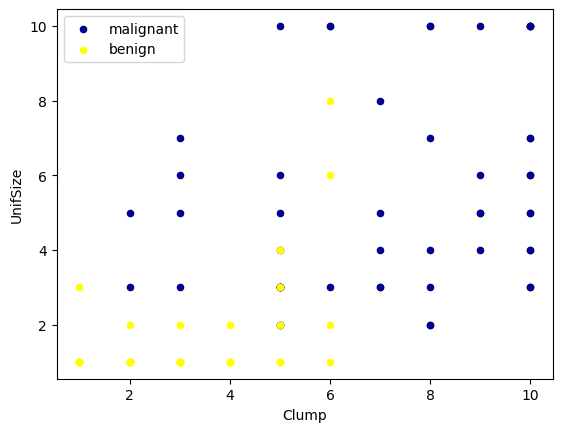

In [4]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

# Semicolon in Python: https://programiz.pro/resources/python-semicolons/

Mapping data into a higher dimensional space is called kernelling.
Kernel functions:
- Linear
- Polynomial
- Sigmoid
- Radial basis function (RBF)

Adventages:
    - memory efficient: uses a subset of training points in the decision function (subset: support vectors)
    - accurate in high dimensional space

Disadventages:
    - Prone to over-fitting (if the number of features is much greater than the number of samples)
    - small dataset (<1000 rows)
    - no probability estimation
    - longer training time duration

- Image recognition
- Text category assigment
- Bioinformatic data (Gene expression classifition etc.)
- Spam detection
- Medical dataset

## Data pre-processing and selection

In [5]:
cell_df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
121,1174057,4,2,1,1,2,2,3,1,1,2
230,1230688,7,4,7,4,3,7,7,6,1,4
260,255644,10,5,8,10,3,10,5,1,3,4
491,1119189,5,8,9,4,3,10,7,1,1,4
666,1347943,5,2,2,2,2,1,1,1,2,2


In [6]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [8]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

In [10]:
X[0:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]], dtype=int64)

In [11]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

In [12]:
y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

## Train/test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [14]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Modeling
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Model (örnek olarak Support Vector Machine - SVM kullanıldı)
model = SVC()

# Grid Search için parametreler
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Grid Search
grid = GridSearchCV(model, param_grid, refit=True, verbose=3)
# Fit the grid search model
grid.fit(X_train, y_train)

# En iyi parametreler
print("En İyi Hiperparametreler:", grid.best_params_)
print("En İyi Doğruluk (Accuracy):", grid.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.954 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.954 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.973 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.936 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.908 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.945 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.908 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

In [16]:
from sklearn import svm

clf = svm.SVC(kernel='sigmoid', gamma=0.001, C=100)
clf.fit(X_train, y_train)

SVC(C=100, gamma=0.001, kernel='sigmoid')

In [17]:
yhat = clf.predict(X_test)
yhat[0:10]

array([4, 4, 4, 4, 4, 4, 2, 2, 4, 4])

# Evaluation

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
cnf_matrix = confusion_matrix(y_test, yhat)

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        89
           4       0.96      0.98      0.97        48

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



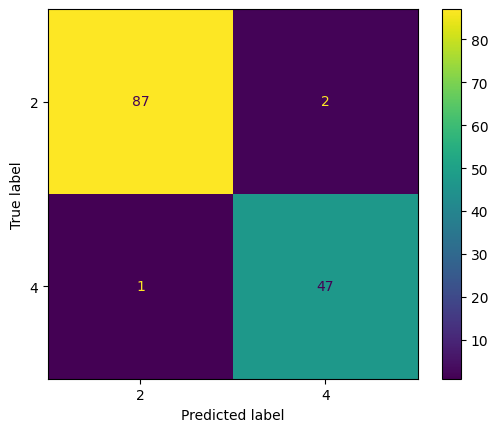

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[2,4])
disp.plot()

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9781532068704714

In [22]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=2)

0.9666666666666667